In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.testing as npt
import pandas as pd
from PIL import Image

# Opening the dataset labels file
To preprocess and combine the labels of the images with their identifying attributes and training features

In [3]:
attr_df = pd.read_table("./data/efigi-1.6/docs/EFIGI_attributes.txt", sep = '\s+')
attr_df['T'].unique

<bound method Series.unique of 0        1
1        0
2       -2
3        9
4        7
        ..
4453     6
4454     4
4455     3
4456     3
4457    10
Name: T, Length: 4458, dtype: int64>

In [4]:
hyper_df  = pd.read_table("./data/efigi-1.6/docs/EFIGI_HyperLeda.txt", sep = '\s+')
hyper_df

,PGC_name,PGC_no,vrad,e_vrad,vopt,e_vopt,v,e_v,vvir,zvir,z_err,type,objname,hl_names
0,PGC0000212,212.0,11230.4,4.5,11110.0,47.0,11229.3,9.0,11287.9,0.037650,0.000030,Sab,IC5381,PGC000212
1,PGC0000218,218.0,1050.3,4.8,1027.4,25.0,1049.5,4.5,1109.0,0.003699,0.000015,Sab,NGC7814,PGC1501809
2,PGC0000243,243.0,-9999.0,-9999.0,8914.3,16.3,8914.3,16.3,8841.8,0.029490,0.000054,S0,NGC7808,6dFJ0003321-104441
3,PGC0000255,255.0,878.1,4.1,-9999.0,-9999.0,878.1,4.1,932.9,0.003112,0.000014,Sm,UGC00017,PGC000255
4,PGC0000281,281.0,-9999.0,-9999.0,11490.7,16.4,11490.7,16.4,11416.0,0.038080,0.000055,Sc,PGC000281,MCG-02-01-015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4453,PGC0072806,72810.0,-9999.0,-9999.0,18356.6,15.9,18356.6,15.9,18341.9,0.061180,0.000053,S0-a,PGC072806,HCG098D
4454,PGC0072922,72920.0,6664.7,7.3,6717.8,20.8,6670.6,12.6,6648.3,0.022180,0.000042,Sb,IC1515,PGC197276
4455,PGC0072927,72930.0,7279.8,7.7,7279.0,18.5,7279.7,5.1,7257.8,0.024210,0.000017,Sbc,IC1516,HIPASSJ2356-00
4456,PGC0072930,72930.0,6668.0,5.2,6651.8,29.1,6667.5,4.1,6652.9,0.022190,0.000014,S0-a,NGC7787,MCG+00-01-005


## Merging the two data frames with only the relevant columns

In [5]:
hyper_df = hyper_df[['PGC_name','PGC_no','type']]
attr_df = attr_df[['PGCname','T','T_inf','T_sup']]
attr_df = attr_df.rename(columns={'PGCname':'PGC_name'})
attr_df = attr_df.merge(hyper_df)
attr_df

,PGC_name,T,T_inf,T_sup,PGC_no,type
0,PGC0000212,1,0,2,212.0,Sab
1,PGC0000218,0,-1,1,218.0,Sab
2,PGC0000243,-2,-3,-2,243.0,S0
3,PGC0000255,9,9,10,255.0,Sm
4,PGC0000281,7,6,9,281.0,Sc
...,...,...,...,...,...,...
4453,PGC0072806,6,4,8,72810.0,S0-a
4454,PGC0072922,4,3,4,72920.0,Sb
4455,PGC0072927,3,2,4,72930.0,Sbc
4456,PGC0072930,3,2,4,72930.0,S0-a


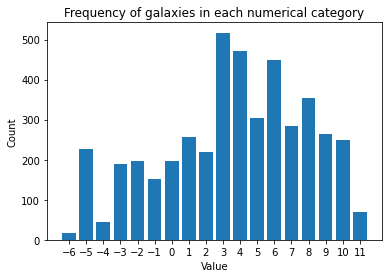

In [6]:
value_counts = attr_df['T'].value_counts()

fig, ax = plt.subplots()
ax.bar(value_counts.index, value_counts.values)
ax.set_xlabel('Value')
ax.set_ylabel('Count')
ax.set_title('Frequency of galaxies in each numerical category')
ax.set_xticks(range(-6, max(attr_df['T'])+1))
plt.show()

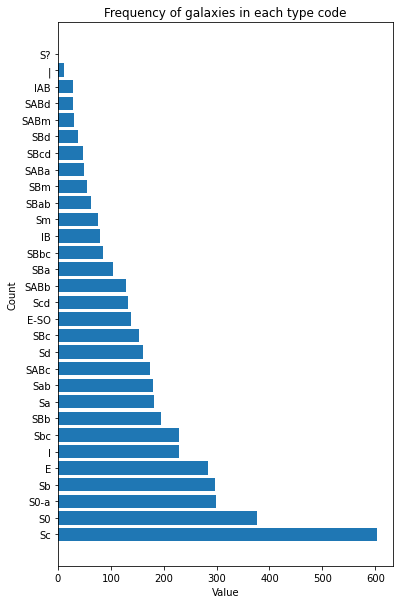

In [7]:
value_counts = attr_df['type'].value_counts()

fig, ax = plt.subplots(figsize=(6,10))
ax.barh(value_counts.index, value_counts.values)
ax.set_xlabel('Value')
ax.set_ylabel('Count')
ax.set_title('Frequency of galaxies in each type code')
plt.show()

# Encoding the numerical types to groups and naming them

This code converts type labels to a common integer, then uses the grouped labels to assign them the corresponding names of each type of galaxy

For reference, this is the overall grouping used:

k_encodings = {
    'Elliptical':(-6,-5,-4),
    'Lenticular_e':-3,
    'Lenticular_i':-2,
    'Lenticular_l':-1,
    'Irregular_m':(10,11),
    'Spiral':0,
    'Spiral_a':(1,2),
    'Spiral_b':(3,4),
    'Spiral_c':(5,6),
    'Spiral_d':(7,8),
    'Spiral_m':9
}

In [8]:
groups = {
    -6:-5,
    -5:-5,
    -4:-5,
    -3:-3,
    -2:-2,
    -1:-1,
    0:0,
    1:1,
    2:1,
    3:3,
    4:3,
    5:5,
    6:5,
    7:7,
    8:7,
    9:9,
    10:10,
    11:10
}

names = {
    -5:'Elliptical',
    -3:'Lenticular_e',
    -2:'Lenticular_i',
    -1:'Lenticular_l',
    0:'Spiral',
    1:'Spiral_a',
    3:'Spiral_b',
    5:'Spiral_c',
    7:'Spiral_d',
    9:'Spiral_m',
    10:'Irregular_m',
}


attr_df['groupT'] = attr_df['T'].map(groups)
attr_df['groupT'] = attr_df['groupT'].astype(int)
attr_df['labels'] = attr_df['groupT'].map(names)
attr_df[['PGC_name','T','groupT','labels']]
attr_df['labels'].unique()

array(['Spiral_a', 'Spiral', 'Lenticular_i', 'Spiral_m', 'Spiral_d',
       'Spiral_c', 'Spiral_b', 'Elliptical', 'Irregular_m',
       'Lenticular_e', 'Lenticular_l'], dtype=object)

In [9]:
names = np.array(attr_df['PGC_name'].to_list())
print(names)
image_dic = {}
for name in names:
    path = (f'./data/efigi-1.6/img_data/png/{name}.png')
    img = Image.open(path)
    img = img.convert('RGB')
    img_array = np.array(img)
    image_dic[name] = img_array

['PGC0000212' 'PGC0000218' 'PGC0000243' ... 'PGC0072927' 'PGC0072930'
 'PGC0073177']


In [10]:
image_dic['PGC0072272'].shape

(255, 255, 3)

# Creating X & y
training and testing data split 80/20 

In [11]:
from sklearn.model_selection import train_test_split

#features that lead to analysis of galaxy shape
X = attr_df[['PGC_name']]

#label for galaxy 
y = attr_df['labels']

#creating train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [17]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

# Load pre-trained Wide ResNet model
model = models.wide_resnet50_2(pretrained=True)
model.eval()

# Define image transforms
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load dataframe that maps image names to categories
df = attr_df

# Define target categories
target_categories = ['Spiral_a', 'Spiral', 'Lenticular_i', 'Spiral_m', 'Spiral_d',
       'Spiral_c', 'Spiral_b', 'Elliptical', 'Irregular_m',
       'Lenticular_e', 'Lenticular_l']

# Define function to predict probabilities for a single image
def predict(image_path):
    # Load image
    image = Image.open(image_path).convert("RGB")

    # Apply image transforms
    image = transform(image)

    # Add batch dimension
    image = image.unsqueeze(0)

    # Make prediction
    with torch.no_grad():
        outputs = model(image)

    # Get probabilities and convert to numpy array
    probs = torch.softmax(outputs, dim=1).numpy()[0]

    # Return dictionary of probabilities for each target category
    return {category: prob for category, prob in zip(target_categories, probs)}

def max_prob(dict):
  return max(dict, key = dict.get), max(dict, key=dict.get)

# Loop through all images and predict probabilities for each
for name, label in zip(df["PGC_name"][:50], df["labels"][:50]):
    image_path = (f'./data/efigi-1.6/img_data/png/{name}.png')
    probs = predict(image_path)
    highest_label= max_prob(probs)[0]
    highest_prob = probs[highest_label]
    print(f"Image {name} has highest probability for {highest_label}, with value {highest_prob} for original category {label}")


Image PGC0000212 has highest probability for Spiral, with value 0.008817560970783234 for original category Spiral_a
Image PGC0000218 has highest probability for Spiral_d, with value 0.0009865171741694212 for original category Spiral
Image PGC0000243 has highest probability for Spiral_d, with value 0.0008682970074005425 for original category Lenticular_i
Image PGC0000255 has highest probability for Spiral_d, with value 0.012045681476593018 for original category Spiral_m
Image PGC0000281 has highest probability for Spiral, with value 0.0022530260030180216 for original category Spiral_d
Image PGC0000282 has highest probability for Spiral, with value 0.002470189006999135 for original category Spiral_c
Image PGC0000451 has highest probability for Spiral, with value 0.007737020496279001 for original category Spiral_d
Image PGC0000548 has highest probability for Spiral, with value 0.004648787900805473 for original category Spiral_d
Image PGC0000635 has highest probability for Spiral, with val